<a href="https://colab.research.google.com/github/difarkry/code_materi/blob/main/Code_pertemuan3_Citra-digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

masukan file foto


Saving frieren-beyond-3840x2160-22999.jpg to frieren-beyond-3840x2160-22999 (1).jpg


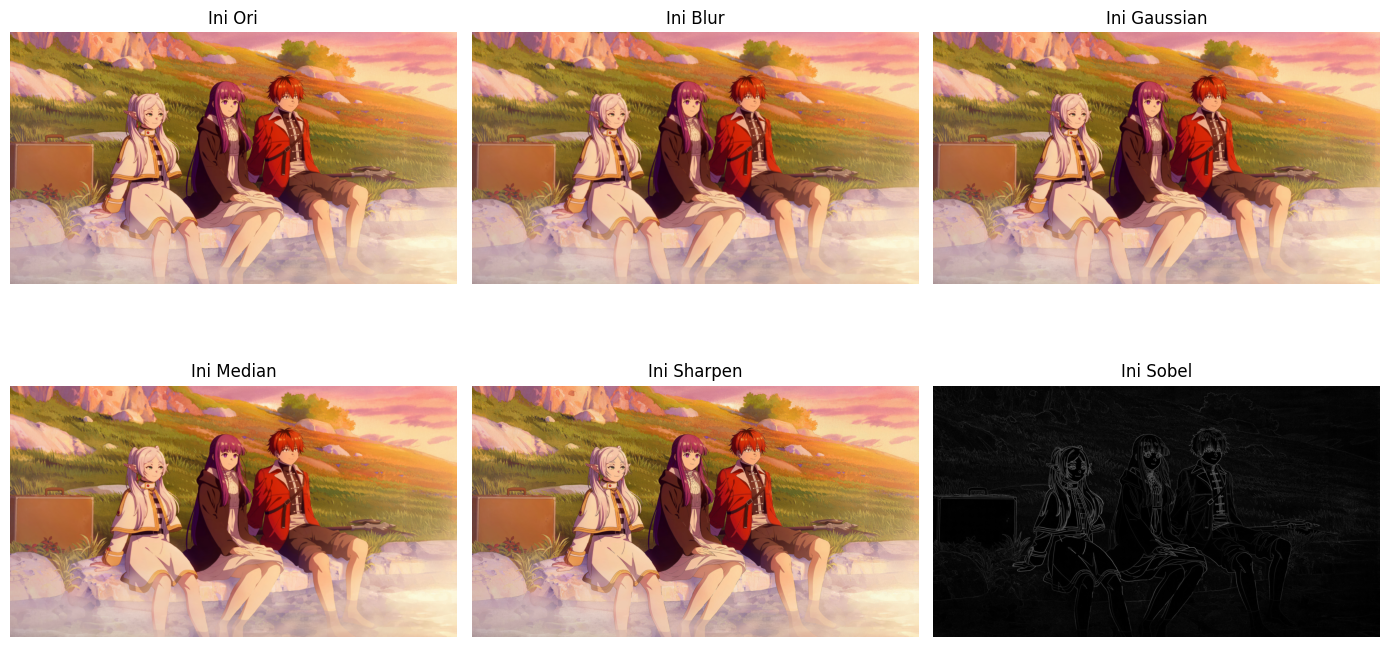

In [5]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("masukan file foto")
uploaded=files.upload()

# baca gambar
filename =list(uploaded.keys())[0]
image = cv2.imread(filename)
img_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Filter Blur
kernel=np.ones((5,5),np.float32)/25
blur=cv2.filter2D(img_rgb, -1, kernel)

# Gausian Blur
gaussian =cv2.GaussianBlur(img_rgb,(5,5),0)

# Median Filter
median=cv2.medianBlur(img_rgb,5)

# Sharpening
sharpe_kernel=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpen=cv2.filter2D(img_rgb,-1,sharpe_kernel)

# Edge
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
sobelx= cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=3)
sobely= cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=3)
sobel_combine=cv2.magnitude(sobelx,sobely)


# tampilkan
plt.figure(figsize=(14,8))

plt.subplot(2,3,1);plt.imshow(img_rgb);plt.title("Ini Ori");plt.axis("off")
plt.subplot(2,3,2);plt.imshow(blur);plt.title("Ini Blur");plt.axis("off")
plt.subplot(2,3,3);plt.imshow(gaussian);plt.title("Ini Gaussian");plt.axis("off")
plt.subplot(2,3,4);plt.imshow(median);plt.title("Ini Median");plt.axis("off")
plt.subplot(2,3,5);plt.imshow(sharpen);plt.title("Ini Sharpen");plt.axis("off")
plt.subplot(2,3,6);plt.imshow(sobel_combine,cmap='gray');plt.title("Ini Sobel");plt.axis("off")

plt.tight_layout()
plt.show()

Upload file foto


Saving itachi-uchiha-dark-3840x2160-20031.jpg to itachi-uchiha-dark-3840x2160-20031 (8).jpg
Masukan kualitas kompres (1-100,def = 30) :50

>> kualitas kompres yang dipilih :50



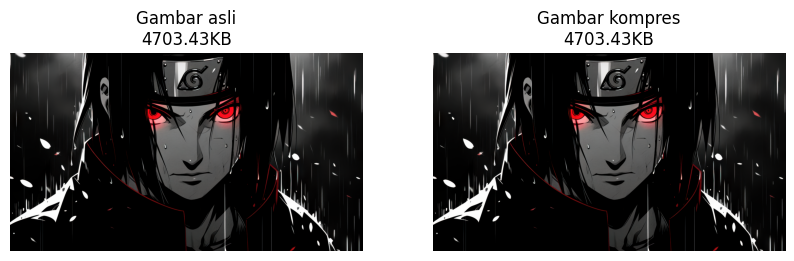

Semua gambar berhasil dikompres


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
from PIL import Image
import os
from google.colab import files
import zipfile
import matplotlib.pyplot as plt

# Import file
print("Upload file foto")
uploaded=files.upload()

# Input kualitas
while True:
  try:
    quality=int(input("Masukan kualitas kompres (1-100,def = 30) :")or 30)
    if 1<=quality <= 100:
      break
    else:
      print("Harus diantara 1-100!")
  except ValueError:
    print("Harus masukan angka")
print(f"\n>> kualitas kompres yang dipilih :{quality}\n")
# fungsi kompres
def compress_image(input_path,output_path,quality=30):
  img=Image.open(input_path)
  img=img.convert("RGB")
  img.save(output_path,"JPEG",optimize=True,quality=quality)
  original_size=os.path.getsize(input_path)/1024
  compres=os.path.getsize(output_path)/1024

  return original_size, compres
# Buat files hasil
output_dir="kompres"
os.makedirs(output_dir,exist_ok=True)

# proses semua gambar dan tampilan hasil
for filename in uploaded.keys():
  output_path= os.path.join(output,f"kompresan_{filename}.jpg")
  orig_size,comp_size=compress_image(filename,output_path,quality=quality)

  # perbandingan gambar
  fig,axes=plt.subplots(1,2,figsize=(10,5))

  # Gambar aseli
  axes[0].imshow(Image.open(filename))
  axes[0].set_title(f'Gambar asli\n{orig_size:.2f}KB')
  axes[0].axis('off')

  # Gambar kompres
  axes[1].imshow(Image.open(filename))
  axes[1].set_title(f'Gambar kompres\n{orig_size:.2f}KB')
  axes[1].axis('off')
  plt.show()
print("Semua gambar berhasil dikompres")
zip_filename="Compressed_image.zip"
with zipfile.ZipFile(zip_filename,'w') as zip:
  for file in os.listdir(output_dir):
    zip.write(os.path.join(output_dir,file),file)

files.download(zip_filename)
